# Proyek Analisis Data: [hour.csv]
- **Nama:** Shakir Salim
- **Email:** salim.syakir@gmail.com
- **ID Dicoding:** shakir-salim

## Menentukan Pertanyaan Bisnis

1. Bagaimana distribusi jumlah penyewa sepeda per jam dalam sehari, dan pada jam berapa terjadi lonjakan tertinggi serta penurunan signifikan dalam permintaan?
2. Bagaimana perbandingan rata-rata jumlah penggunaan sepeda rental antara pelanggan tetap dan non-pelanggan tetap dalam satu hari, dan pada jam-jam tertentu apakah terdapat perbedaan signifikan dalam intensitas penggunaan antara kedua segmen tersebut?
3. Bagaimana pola jumlah penyewa sepeda setiap jam dalam 24 jam selama satu minggu, dan pada hari serta jam manakah terjadi lonjakan atau penurunan penggunaan yang paling signifikan?

## Import Semua Packages/Library yang Digunakan

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Data Wrangling

### Gathering Data

In [52]:
# Load dataset dari GitHub
hourly_url = "https://raw.githubusercontent.com/shakir91/Proyek_Analisis_Data_LaskarAI/main/data/hour.csv"

In [53]:
#baca datasets
hour_df = pd.read_csv(hourly_url)

### Assessing Data

In [54]:
#pengecekan tipe data dataset hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Cleaning Data

In [55]:
#Data Pre-Processing
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['datetime'] = hour_df['dteday'] + pd.to_timedelta(hour_df['hr'], unit='h')
hour_df['hour'] = hour_df['datetime'].dt.hour
hour_df['weekday'] = hour_df['datetime'].dt.day_name()
hour_df['season'] = hour_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_df['weathersit'] = hour_df['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'})

In [56]:
print("Dataset Shape:", hour_df.shape)
print("\nMissing Values:")
print(hour_df.isnull().sum())
print("\nSummary Statistics:")
hour_df[['cnt', 'casual', 'registered', 'temp', 'hum', 'windspeed']].describe().T

Dataset Shape: (17379, 19)

Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
datetime      0
hour          0
dtype: int64

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
cnt,17379.0,189.463088,181.387599,1.00,40.0000,142.000,281.0000,977.0000
casual,17379.0,35.676218,49.305030,0.00,4.0000,17.000,48.0000,367.0000
registered,17379.0,153.786869,151.357286,0.00,34.0000,115.000,220.0000,886.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.500,0.6600,1.0000
hum,17379.0,0.627229,0.192930,0.00,0.4800,0.630,0.7800,1.0000
windspeed,17379.0,0.190098,0.122340,0.00,0.1045,0.194,0.2537,0.8507


In [57]:
#print top 5 dataset hour
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,datetime,hour
0,1,2011-01-01,Spring,0,1,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01 00:00:00,0
1,2,2011-01-01,Spring,0,1,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01 01:00:00,1
2,3,2011-01-01,Spring,0,1,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01 02:00:00,2
3,4,2011-01-01,Spring,0,1,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01 03:00:00,3
4,5,2011-01-01,Spring,0,1,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01 04:00:00,4


In [58]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()


Jumlah duplikasi:  0


,instant,dteday,yr,mnth,hr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,datetime,hour
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,0.502561,6.537775,11.546752,0.028770,0.682721,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,2012-01-02 15:41:22.858622464,11.546752
min,1.0000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2011-01-01 00:00:00,0.000000
25%,4345.5000,2011-07-04 00:00:00,0.000000,4.000000,6.000000,0.000000,0.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,2011-07-04 22:30:00,6.000000
50%,8690.0000,2012-01-02 00:00:00,1.000000,7.000000,12.000000,0.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,2012-01-02 21:00:00,12.000000
75%,13034.5000,2012-07-02 00:00:00,1.000000,10.000000,18.000000,0.000000,1.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,2012-07-02 06:30:00,18.000000
max,17379.0000,2012-12-31 00:00:00,1.000000,12.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,2012-12-31 23:00:00,23.000000
std,5017.0295,NaN,0.500008,3.438776,6.914405,0.167165,0.465431,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,NaN,6.914405


## Exploratory Data Analysis (EDA)

### Exploratory

Hourly Usage Patterns

In [59]:
#Hourly Usage Patterns
hourly_avg = hour_df.groupby('hr')['cnt'].mean()
hourly_avg.describe(include="all")

count     24.000000
mean     188.478966
std      131.474361
min        6.352941
25%       70.507621
50%      210.103851
75%      253.402245
max      461.452055
Name: cnt, dtype: float64

User Type Analysis

In [60]:
user_types = hour_df.groupby('hr')[['casual', 'registered']].mean()
user_types.describe(include="all")

,casual,registered
count,24.000000,24.000000
mean,35.481185,152.997781
std,28.249635,110.873223
min,1.253945,5.098996
25%,9.244838,64.846986
50%,29.573414,156.991910
75%,62.914148,192.599935
max,75.567901,387.178082


Weekly Pattern Heatmap

In [61]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = hour_df.groupby(['weekday', 'hr'])['cnt'].mean().unstack()
heatmap_data.describe(include=("all"))

hr,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,53.741523,33.191761,22.706968,11.407697,6.322547,19.808700,76.161995,212.906680,360.212649,219.517091,...,240.500826,250.836695,311.849529,461.822554,425.815111,311.704710,226.151967,172.406624,131.403249,87.861048
std,28.623826,27.319172,23.087928,10.949219,1.618309,7.858271,40.890209,120.723102,180.377383,35.824557,...,92.611226,83.842041,38.207689,93.991016,102.759529,57.482443,39.449899,24.560769,19.793108,22.146955
min,27.623762,12.540000,6.801980,4.152174,4.968750,8.291262,14.495146,33.104762,83.857143,156.542857,...,168.365385,181.288462,272.961538,318.771429,272.628571,225.476190,168.028571,127.647619,94.123810,61.895238
25%,34.283608,16.279920,8.485294,4.980159,5.205657,15.173862,53.432692,147.250183,263.334249,202.616392,...,174.055592,191.689787,285.375000,413.411493,356.519231,271.000000,197.096154,162.937500,124.019231,70.788462
50%,39.271845,17.307692,10.313131,5.113402,5.785714,23.903846,90.028846,254.326923,462.278846,236.450980,...,192.701923,202.365385,286.701923,502.394231,481.346154,344.576923,242.076923,174.538462,139.663462,83.737864
75%,73.211538,46.251053,31.617811,14.741877,6.864654,25.102723,106.968447,301.838424,480.055618,239.701316,...,296.496978,303.197436,343.195192,520.245192,498.062640,355.713966,254.926251,190.450336,145.378314,105.980769
max,94.304762,77.432692,61.627451,31.144231,9.362745,25.912621,107.807692,304.737864,488.572816,258.990385,...,381.333333,382.428571,366.142857,544.278846,517.567308,358.451923,268.913462,197.884615,147.240385,115.855769


## Visualization & Explanatory Analysis

Average Hourly Rentals Pattern

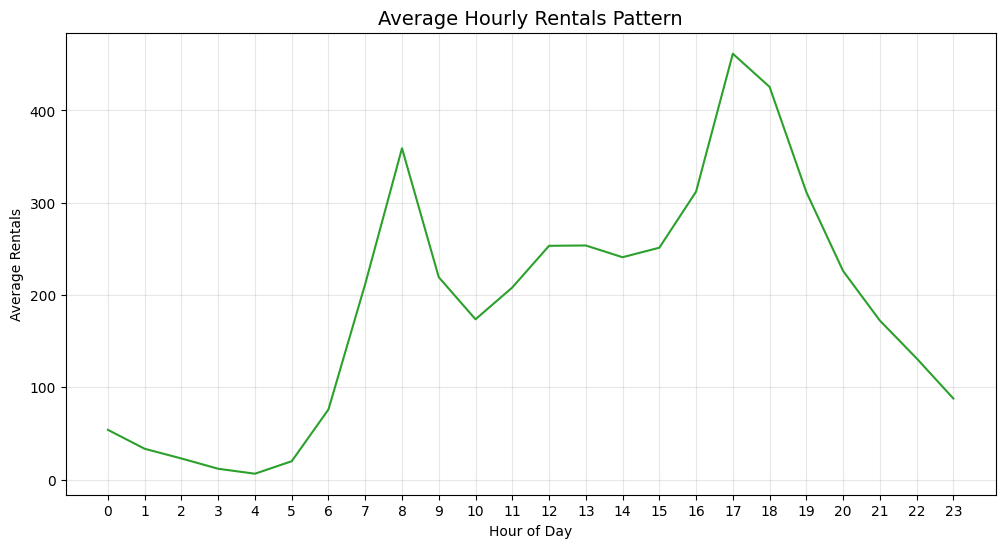

In [62]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, color='#2ca02c')
plt.title('Average Hourly Rentals Pattern', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.show()

Hourly Usage by User Type

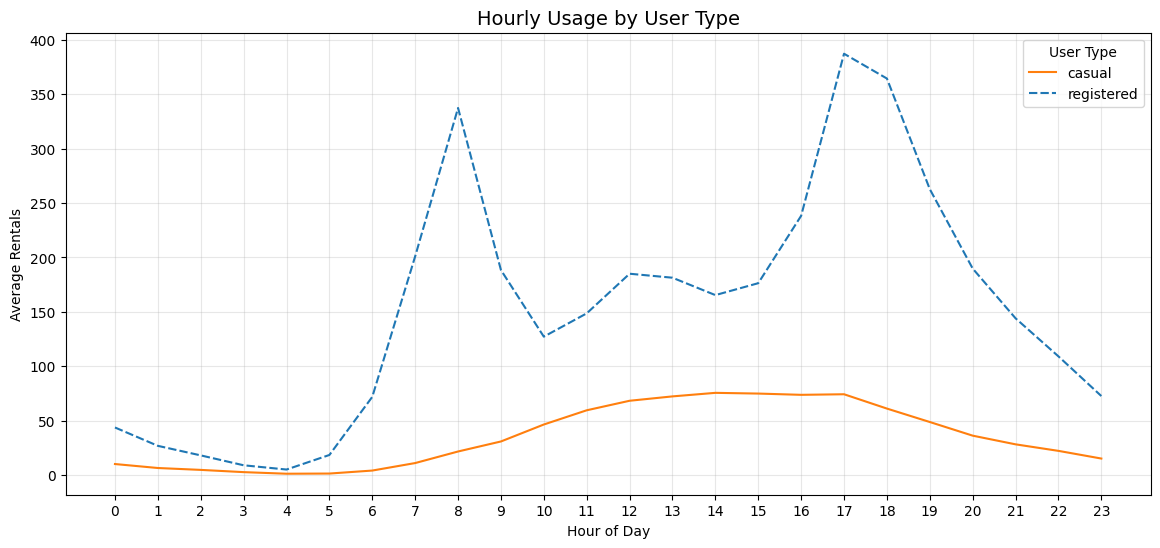

In [63]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=user_types, palette=['#ff7f0e', '#1f77b4'])
plt.title('Hourly Usage by User Type', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.xticks(range(0, 24))
plt.legend(title='User Type')
plt.grid(True, alpha=0.3)
plt.show()

Weekly Rental Patterns

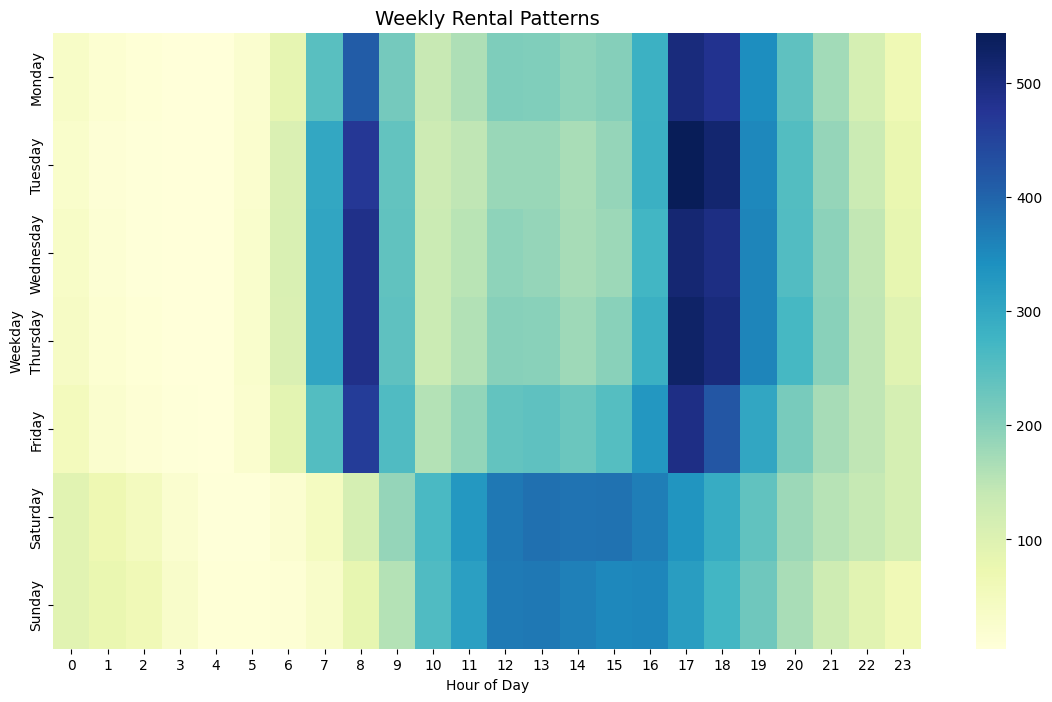

In [64]:
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data.loc[weekday_order], cmap='YlGnBu', annot=False)
plt.title('Weekly Rental Patterns', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Weekday')
plt.show()

## Kesimpulan

**Kesimpulan Pertanyaan 1**

**Distribusi Penyewaan Sepeda per Jam dalam Sehari**
Pola Umum:
Grafik menunjukkan pola distribusi yang mengikuti aktivitas harian masyarakat dengan dua puncak utama (bimodal pattern).
Jam-jam dengan Lonjakan Tertinggi:
 - Puncak tertinggi terjadi pada jam 17:00 (5 sore) dengan sekitar 460 penyewaan rata-rata
 - Puncak kedua terjadi pada jam 8:00 (8 pagi) dengan sekitar 360 penyewaan rata-rata

**Jam-jam dengan Penurunan Signifikan:**
Titik terendah terjadi pada jam 4:00 (4 pagi) dengan hampir 0 penyewaan
Penurunan drastis terjadi setelah jam 19:00 hingga jam 5:00 pagi
Penurunan sementara terjadi pada jam 10:00 (turun ke ~180 penyewaan) setelah peak pagi

**Interpretasi Bisnis:**
Pola ini mencerminkan kebiasaan commuting pekerja/pelajar:
 - Peak pagi (jam 8) menunjukkan perjalanan ke tempat kerja/sekolah
 - Peak sore (jam 17) menunjukkan perjalanan pulang kerja
 - Aktivitas minimal pada dini hari (jam 0-5)
 - Periode siang hari (jam 12-14) menunjukkan aktivitas yang cukup stabil sekitar 250 penyewaan

**Rekomendasi Operasional:**
 - Siapkan lebih banyak sepeda di jam 7-9 pagi dan 16-18 sore
 - Lakukan maintenance pada jam 2-5 pagi ketika permintaan minimal
 - Pertimbangkan strategi redistribusi sepeda antara jam sibuk pagi dan sore

**Kesimpulan Pertanyaan 2**

**Perbandingan Penggunaan Sepeda antara Registered dan Casual Users**

**Pola Penggunaan Registered Users (Garis Putus-putus Biru):**
Menunjukkan pola **bimodal yang sangat jelas** dengan dua puncak tajam
**Puncak pagi:** Jam 8:00 (~330 rentals)
**Puncak sore:** Jam 17:00 (~390 rentals) - tertinggi sepanjang hari
**Pola commuting yang khas:** Naik drastis jam 6-8 pagi, turun jam 9-10, stabil siang hari (~180-190), naik lagi jam 16-17
Aktivitas minimal pada dini hari (jam 0-5) dan malam hari (setelah jam 19)

**Pola Penggunaan Casual Users (Garis Solid Oranye):**
Menunjukkan pola unimodal yang lebih landai
Puncak tunggal: Jam 17:00 (~75 rentals)
Aktivitas bertahap: Mulai naik jam 6 pagi, terus meningkat hingga sore
Relatif stabil sepanjang hari siang (jam 11-17) sekitar 60-75 rentals
Tidak ada lonjakan tajam seperti registered users

**Perbedaan Signifikan:**

**Volume Penggunaan:**
Registered users mendominasi dengan volume 4-5x lebih tinggi dari casual users
Peak registered users (~390) vs peak casual users (~75)

**Intensitas pada Jam Tertentu:**
**Jam 6-9 pagi:** Perbedaan sangat signifikan - registered users naik drastis untuk commuting, casual users masih minimal
**Jam 16-18 sore:** Perbedaan terbesar - registered users mencapai puncak tertinggi, casual users hanya meningkat sedikit
**Jam 10-15 siang:** Perbedaan paling kecil - registered users turun, casual users relatif stabil

**Karakteristik Perilaku:**
Registered users: Perilaku commuting yang jelas (rumah-kerja-rumah)
Casual users: Perilaku rekreasional/leisure yang lebih merata sepanjang hari

**Interpretasi Bisnis:**
Registered users adalah segmen utama yang menggunakan sepeda untuk transportasi reguler (commuting)
Casual users cenderung menggunakan sepeda untuk aktivitas santai/rekreasi
Strategi operasional harus fokus pada kebutuhan registered users di jam-jam commuting
Potensi peningkatan casual users pada jam-jam non-peak dan akhir pekan

**Rekomendasi Strategis:**
Prioritaskan ketersediaan sepeda untuk registered users di jam 7-9 dan 16-18
Kembangkan program untuk meningkatkan konversi casual users menjadi registered users
Pertimbangkan pricing strategy yang berbeda untuk setiap segmen berdasarkan pola usage
RetryClaude can make mistakes. Please double-check responses.


**Kesimpulan Pertanyaan 3**

**Pola Penyewaan Sepeda 24 Jam Selama Seminggu**
**Pola Umum Mingguan:**

**Hari Kerja (Senin-Jumat):**
Menunjukkan pola bimodal yang konsisten dengan dua puncak aktivitas
Puncak pagi: Jam 7-9 (warna biru tua, ~400-500+ rentals)
Puncak sore: Jam 17-19 (warna biru tua, ~400-500+ rentals)
Aktivitas minimal: Jam 0-5 dan 22-23 (warna kuning muda, <100 rentals)

**Akhir Pekan (Sabtu-Minggu):**
Menunjukkan pola unimodal yang lebih landai
Aktivitas mulai naik: Jam 8-9 (lebih lambat dari hari kerja)
Puncak siang: Jam 12-16 (warna biru sedang, ~300-400 rentals)
Tidak ada rush hour yang jelas seperti hari kerja

**Lonjakan Paling Signifikan:**

**Tertinggi:**
Selasa-Kamis jam 8:00 (warna biru paling gelap, ~500+ rentals)
Senin-Kamis jam 17-18:00 (warna biru paling gelap, ~500+ rentals)

**Puncak Akhir Pekan:**
Sabtu-Minggu jam 13-15 (warna biru sedang, ~350-400 rentals)

**Penurunan Paling Signifikan:**
**Terendah:**
Seluruh hari jam 3-4 pagi (warna kuning paling terang, <50 rentals)
Minggu malam jam 22-23 (aktivitas paling rendah sepanjang minggu)

**Drop Signifikan:**
Jumat sore menunjukkan penurunan dibanding hari kerja lainnya
Transisi Minggu malam ke Senin pagi (jam 20-6)

**Insights Bisnis Penting:**

**Karakteristik Hari Kerja:**
Selasa-Kamis: Hari tersibuk dengan pola commuting paling jelas
Senin: Sedikit lebih rendah dari mid-week
Jumat: Puncak sore lebih rendah (kemungkinan WFH/flex time)

**Karakteristik Akhir Pekan:**
Sabtu: Lebih aktif dari Minggu, puncak siang hari
Minggu: Aktivitas paling rendah, terutama pagi dan malam

**Pola Temporal:**
Jam 7-9 hari kerja: Commuting pagi (transportasi ke kantor)
Jam 17-19 hari kerja: Commuting sore (transportasi pulang)
Jam 12-16 weekend: Aktivitas rekreasional/leisure

**Rekomendasi Operasional:**

**Alokasi Sepeda:**
Maksimalkan ketersediaan Selasa-Kamis jam 7-9 dan 17-19
Distribusi merata di akhir pekan jam 12-16

**Maintenance:**
Optimal pada jam 2-5 pagi (semua hari)
Minggu malam ideal untuk maintenance besar

**Strategi Pricing:**
Premium pricing saat rush hour hari kerja
Promosi khusus weekend untuk meningkatkan usage

**Kapasitas Operasional:**
Staff maksimal: Selasa-Kamis
Staff minimal: Minggu dan dini hari